### 参考：python机器学习及实践

In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model.logistic import LogisticRegression

### 准备数据源

In [54]:
df_train = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-train.csv')
df_test = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-test.csv')
df_test_negative = df_test.loc[df_test['Type'] == 0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test.loc[df_test['Type'] == 1][['Clump Thickness', 'Cell Size']]

### 数据探索，了解数据分布

In [55]:
df_train_stat=df_train[['Clump Thickness','Cell Size','Type']]
df_train_stat.describe().round(2).T #round函数设置显示小数位，T表示转置

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,524.0,3.17,3.05,1.0,1.0,1.0,5.0,10.0
Cell Size,524.0,3.29,3.01,1.0,1.0,2.0,5.0,10.0
Type,524.0,0.35,0.48,0.0,0.0,0.0,1.0,1.0


### 逻辑回归处理二元分类

In [56]:
classifier=LogisticRegression()
classifier.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])

accuracy=classifier.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type'])
print ('Testing accuracy:', accuracy)

Testing accuracy: 0.9371428571428572


/Users/kenly/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 函数定义

In [57]:
def regression_fun(x,coef,intercept):
    return (-intercept - x * coef[0]) / coef[1]

### 模型与测试数据图像

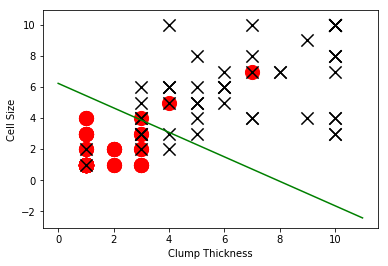

In [58]:
intercept = classifier.intercept_
coef = classifier.coef_[0, :]

lx = np.arange(0, 12)
ly = regression_fun(lx,coef,intercept)

plt.plot(lx, ly, c='green')

plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.show()

### 使用模型推理

In [59]:
predictions=classifier.predict(df_test[['Clump Thickness', 'Cell Size']])

for i,prediction in enumerate(predictions[0:10]):
    data = df_test[['Clump Thickness','Cell Size']].iloc[i]
    str = "{Thickness:%s,Size:%s} is %d" %(data['Clump Thickness'],data['Cell Size'],prediction)
    print(str)

{Thickness:1,Size:2} is 0
{Thickness:1,Size:1} is 0
{Thickness:1,Size:1} is 0
{Thickness:5,Size:5} is 1
{Thickness:1,Size:1} is 0
{Thickness:1,Size:1} is 0
{Thickness:3,Size:2} is 0
{Thickness:6,Size:6} is 1
{Thickness:4,Size:10} is 1
{Thickness:3,Size:3} is 0
